In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import pickle

In [28]:
import matplotlib
matplotlib.rcParams.update({'font.size': 24})

In [29]:
with open('params00.pickle', 'rb') as f:
    param_dict = pickle.load(f)
    
θ = param_dict['θ']
α = param_dict['α']
γ = param_dict['γ']
μ = param_dict['μ']
c = param_dict['c']
Δ = param_dict['Δ']

In [37]:
def Unum(ξ, μ, α, γ, θ, Δ, c):
    return (1.0/2.0)*(1 - np.exp(-Δ))*np.exp(-ξ)*(lambda input: np.heaviside(input,0.5))(ξ)/(μ*c + 1) + ((1.0/2.0)*(-np.exp(Δ)/(μ*c - 1) + 1.0/(μ*c - 1))*np.exp(ξ) + (( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2)*np.exp(Δ/(μ*c)) - ( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1.0/2.0*μ*c + θ*(( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1) + (1.0/2.0)*(μ*c - 1)*np.exp(-Δ) + 1.0/2.0)*np.exp(ξ/(μ*c))/(( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1))*(lambda input: np.heaviside(input,0.5))(-Δ - ξ) + ((θ + (-( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1.0/2.0*μ*c + ((1.0/2.0)*μ*c - 1.0/2.0)*np.exp(-Δ) + 1.0/2.0)/(( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1))*np.exp(ξ/(μ*c)) + 1 - 1.0/2.0*np.exp(-Δ)*np.exp(-ξ)/(μ*c + 1) + (1.0/2.0)*np.exp(ξ)/(μ*c - 1))*(lambda input: np.heaviside(input,0.5))(-ξ)*(lambda input: np.heaviside(input,0.5))(Δ + ξ)

def Anum(ξ, μ, α, γ, θ, Δ, c):
    return γ*(1 - np.exp(ξ/(α*c)))*(lambda input: np.heaviside(input,0.5))(-ξ)*(lambda input: np.heaviside(input,0.5))(Δ + ξ) + γ*(np.exp(Δ/(α*c)) - 1)*np.exp(ξ/(α*c))*(lambda input: np.heaviside(input,0.5))(-Δ - ξ)

def J(ξ, μ, α, γ, θ, Δ, c):
    return Unum(ξ, μ, α, γ, θ, Δ, c) - Anum(ξ, μ, α, γ, θ, Δ, c)

def Jdiff(ξ, μ, α, γ, θ, Δ, c):
    return -1.0/2.0*(1 - np.exp(-Δ))*np.exp(-ξ)*(lambda input: np.heaviside(input,0.5))(ξ)/(μ*c + 1) + ((-1.0/2.0*np.exp(Δ)/(μ*c - 1) + (1.0/2.0)/(μ*c - 1))*np.exp(ξ) + (( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2)*np.exp(Δ/(μ*c)) - ( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1.0/2.0*μ*c + θ*(( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1) + (1.0/2.0)*(μ*c - 1)*np.exp(-Δ) + 1.0/2.0)*np.exp(ξ/(μ*c))/(μ*c*(( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1)) - γ*(np.exp(Δ/(α*c)) - 1)*np.exp(ξ/(α*c))/(α*c))*(lambda input: np.heaviside(input,0.5))(-Δ - ξ) + ((1.0/2.0)*np.exp(-Δ)*np.exp(-ξ)/(μ*c + 1) + (1.0/2.0)*np.exp(ξ)/(μ*c - 1) + (θ + (-( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1.0/2.0*μ*c + ((1.0/2.0)*μ*c - 1.0/2.0)*np.exp(-Δ) + 1.0/2.0)/(( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1))*np.exp(ξ/(μ*c))/(μ*c) + γ*np.exp(ξ/(α*c))/(α*c))*(lambda input: np.heaviside(input,0.5))(-ξ)*(lambda input: np.heaviside(input,0.5))(Δ + ξ)


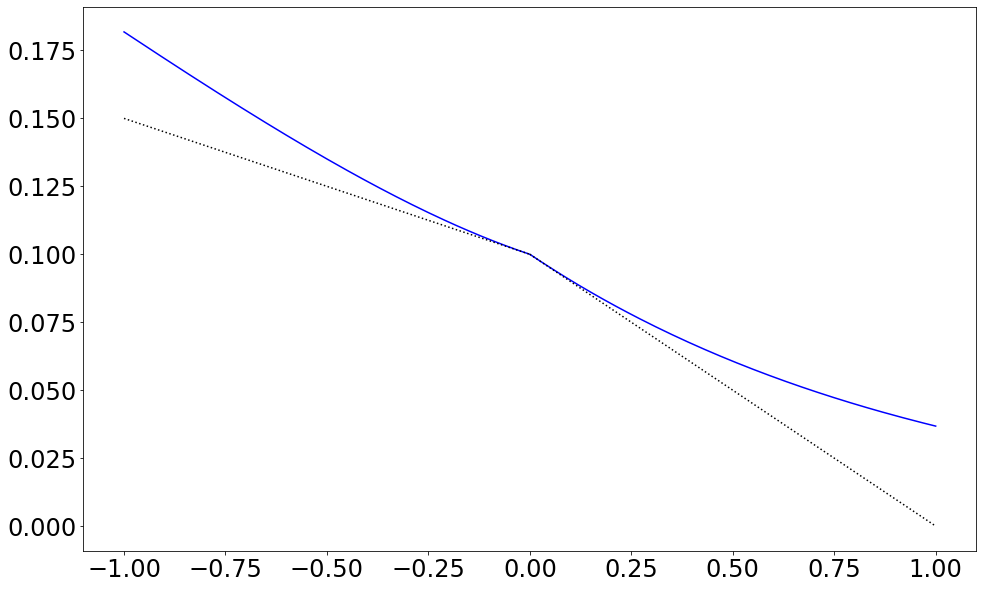

In [46]:
x0 = 0

xs = np.linspace(-1, 1, 201)

xs_right = xs[xs >= x0]
xs_left = xs[xs <= x0]

fig = plt.figure(figsize=(16, 10))
plt.plot(xs, J(xs, **param_dict), 'b-')
plt.plot(xs_right, J(x0, **param_dict) + Jdiff(x0+1e-10, **param_dict)*xs_right, 'k:')
plt.plot(xs_left, J(x0, **param_dict) + Jdiff(x0-1e-10, **param_dict)*xs_left, 'k:')

In [22]:
np.exp(Δ)

181600953536357.12

In [23]:
- 1/(2*θ*(1+μ*c) - 1)

65.72368421047946